In [1]:
## Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# remove unwanted attributes
data = data.drop(['PassengerId','Ticket'], axis=1)

# Feature Extraction

## Cabin

In [6]:
data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
def show_decks(df):
    temp = []
    for i in df['Cabin'].unique():
        a = str(i)[0]
        if a not in temp:
            temp.append(a)
    return temp

show_decks(data)

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

![](http://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png)

### Implementing Cabin Transformer
* Extract the first alphabetic character of the Cabin which is a deck of the ship
* Group the decks level wise from top to bottom

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class CabinTransformer(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def extract_cabin(self, cabin):
        cabin = str(cabin)
        if cabin=='nan':
            return 'U'
        else:
            return cabin[0]

    def group_deck(self, deck):
        if deck in ['A','B','C','T']:
            return 'ABC'  # Top 3 Decks
        elif deck in ['D','E']:
            return 'DE'  # Next 2 Decks from top
        elif deck in ['F','G']:
            return 'FG'  # Bottom 2 Decks
        else:
            return 'U'
        
    def transform(self, df):
        df1 = df.copy()
        df1['Cabin'] = df1['Cabin'].apply(self.extract_cabin)
        df1['Cabin'] = df1['Cabin'].apply(self.group_deck)
        
        cabin_maps = {'ABC':0, 'DE':1, 'FG':2, 'U':3}
        df1['Cabin'] = df1['Cabin'].map(cabin_maps)
        return df1

In [9]:
CabinTransformer().fit_transform(data).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,3,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,3,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,3,S


<AxesSubplot:xlabel='Cabin', ylabel='count'>

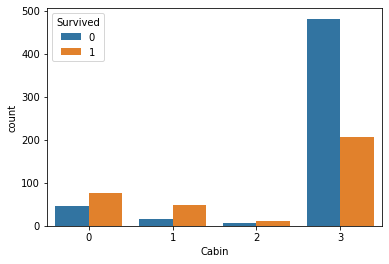

In [10]:
sns.countplot(x='Cabin',hue = 'Survived', data=CabinTransformer().fit_transform(data))

## Name
Name of the passenger contains his/her title and Rank on the ship will be a usefull information

In [11]:
temp = []
for name in data['Name']:
    a = name.split(', ')[1].split('.')[0]
    if a not in temp:
        temp.append(a)
print('Titles present on the ship:\n', temp)

Titles present on the ship:
 ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


### Implementing Name Column Transformer
* Extract titles from the name of the passenger
* Group the titles according to Rank they hold

In [12]:
class CustomAttributeTitle(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def title(self, name):
        return name.split(', ')[1].split('.')[0]
    
    def group(self, title):
        if title in ['Miss', 'Mlle', 'Ms']:
            return 'Miss'
        
        if title in ['Mrs', 'Mme']:
            return 'Mrs'
        
        if title in ['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
            return 'Rare'
        
        else:
            return title
        
    
    def transform(self, df):
        df1 = df.copy()
        df1['Title'] = df1['Name'].apply(self.title)
        df1['Title'] = df1['Title'].apply(self.group)
        
        title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 0}
        df1['Title'] = df1['Title'].map(title_mapping)
        df1['Title'] = df1['Title'].fillna(0)
        df1 = df1.drop('Name', axis=1)
        
        return df1

In [13]:
CustomAttributeTitle().fit_transform(data).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,3
2,1,3,female,26.0,0,0,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,53.1000,C123,S,3
4,0,3,male,35.0,0,0,8.0500,NaN,S,1


<AxesSubplot:xlabel='Title', ylabel='count'>

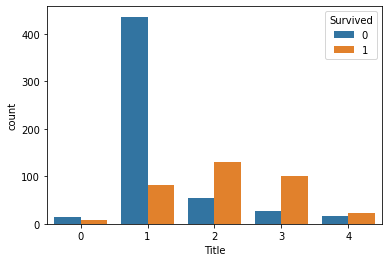

In [14]:
#f = plt.figure(figsize=(12,8))
sns.countplot(x='Title',hue = 'Survived', data=CustomAttributeTitle().fit_transform(data))

## Age

array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])

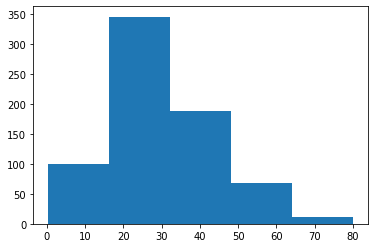

In [15]:
plt.hist(data['Age'], bins=5)[1]

In [16]:
def AgeBand(df):
    df1 = df.copy()
    df1['AgeBand'] = pd.cut(df1['Age'], 5)
    return df1[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand(data)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


### Implementing Age Column transformer
* Impute the missing values in the age column by using the median values of each title. As a result no master will be in the age of 30.

In [17]:
class AgeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, df):
        self.means = {}
        for i in df['Title'].unique():
            m = df[df['Title']==i]['Age'].median()
            self.means[i] = m
        return self
    
    def transform(self, df):
        df1 = df.copy()
        index_values = df1.index.values.astype(int)
        for i in index_values:
            age = df1.at[i, 'Age'].astype(float)
            if np.isnan(age):
                title = df1.loc[i, 'Title']
                df1.loc[i, 'Age'] = round(self.means[title], 2)
        
        df1["AgeGroup"] = pd.cut(df1["Age"], bins=[-0.001, 16.336, 32.252, 48.168, 64.084, 80.0], labels=[0,1,2,3,4])
        df1["AgeGroup"] = df1["AgeGroup"].astype(int)

        
        return df1

In [18]:
AgeTransformer().fit_transform(CustomAttributeTitle().fit_transform(data)).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeGroup
0,0,3,male,22.0,1,0,7.2500,NaN,S,1,1
1,1,1,female,38.0,1,0,71.2833,C85,C,3,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,2,1
3,1,1,female,35.0,1,0,53.1000,C123,S,3,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,1,2


## Custom Attributes

### Implementing Feature extraction to create new features
* add SibSP and Parch attributes to get family belongings or followers on the ship

In [19]:
class CustomAttributes(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        df1 = df.copy()
        df1['FamilySize'] = df1['SibSp'] + df1['Parch']
        df1 = df1.drop(['SibSp','Parch'], axis=1)
        
        df1['IsAlone'] = 0
        df1.loc[df1['FamilySize'] == 1, 'IsAlone'] = 1
        # df1 = df1.drop('FamilySize', axis=1)
        
        df1['Age*Class'] = df1.Age * df1.Pclass
        
        return df1

In [20]:
CustomAttributes().fit_transform(data).head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone,Age*Class
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,1,1,66.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,1,1,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,0,0,78.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,1,1,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,0,0,105.0


<AxesSubplot:xlabel='IsAlone', ylabel='count'>

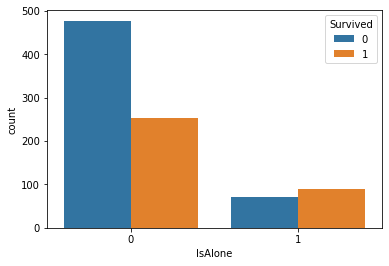

In [21]:
sns.countplot(x='IsAlone',hue = 'Survived', data=CustomAttributes().fit_transform(data))

## Fare

array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
       307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])

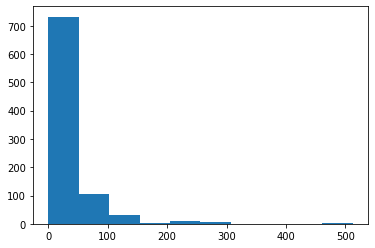

In [22]:
plt.hist(data['Fare'])[1]

In [23]:
def FareBand(df):
    df1 = df.copy()
    df1['FareBand'] = pd.qcut(df1['Fare'], 4)
    return df1[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

FareBand(data)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


### Implementing Fare Column Transformer


In [24]:
from sklearn.impute import SimpleImputer
class FareTransformer(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        df1 = df.copy()
        # handle missing values
        df1['Fare'] = SimpleImputer(strategy='mean').fit_transform(df1[['Fare']])
        # Making bins according to distribution
        df1["Fare"] = pd.cut(df1["Fare"], bins=[-0.001, 7.91, 14.454, 31.0, 512.329200], labels=[0,1,2,3])
        df1["Fare"] = df1["Fare"].astype(int)
        return df1

In [25]:
FareTransformer().fit_transform(data).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,3,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,NaN,S


<AxesSubplot:xlabel='Fare', ylabel='count'>

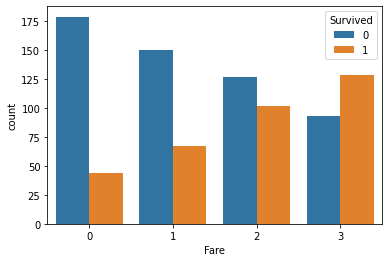

In [26]:
sns.countplot(x='Fare', hue='Survived', data=FareTransformer().transform(data))

## Categorical Transformation

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def fit(self, df):
        return self
    
    def transform(self, df):
        df1 = df.copy()
        df1[['Sex','Embarked','Pclass']] = SimpleImputer(strategy='most_frequent').fit_transform(df1[['Sex','Embarked','Pclass']])
        df1['Sex'] = df1['Sex'].map({'male':0, 'female':1})
        df1[['Embarked','Pclass']] = OrdinalEncoder().fit_transform(df1[['Embarked','Pclass']])
        return df1

In [28]:
CategoricalTransformer().fit_transform(data).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2.0,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,2.0
1,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,0.0
2,1,2.0,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,2.0
3,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,2.0
4,0,2.0,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,2.0


# Transformation Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [30]:
labels = data['Survived']
data = data.drop('Survived', axis=1)

In [31]:
preprocess_pipeline = Pipeline([
    ('title', CustomAttributeTitle()),
    ('age', AgeTransformer()),
    ('cabin', CabinTransformer()),
    ('followers', CustomAttributes()),
    ('fare', FareTransformer()),
    ('encoding', CategoricalTransformer()),
    ('pca', PCA(n_components=7))
])


In [32]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [33]:
data_processed = preprocess_pipeline.fit_transform(data)
print('shape of processed data:', data_processed.shape)

shape of processed data: (891, 7)


# Model Selection

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_processed, labels, test_size=0.2, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [36]:
models = {'LogReg': LogisticRegression(),
         'XGBoost': XGBClassifier(use_label_encoder=False),
         'DecisionTree': DecisionTreeClassifier(),
         'RandomForest': RandomForestClassifier(n_estimators=100),
          'AdaBoost': AdaBoostClassifier(),
          'GradBoost': GradientBoostingClassifier(),
         'KNN': KNeighborsClassifier(n_neighbors=3),
         'LinearSVC': LinearSVC(max_iter=1500)}

res1, res2 = [], []
for i in models.keys():
    model = models[i]
    model.fit(x_train, y_train)
    res1.append(model.score(x_train, y_train))
    res2.append(cross_val_score(model, x_train, y_train).mean())
pd.DataFrame({'Models':models.keys(), 'Training Score':res1, 'Cross val Score':res2})

[05:59:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:59:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

,Models,Training Score,Cross val Score
0,LogReg,0.801966,0.796326
1,XGBoost,0.957865,0.790692
2,DecisionTree,0.957865,0.738777
3,RandomForest,0.957865,0.813159
4,AdaBoost,0.856742,0.789294
5,GradBoost,0.921348,0.793519
6,KNN,0.859551,0.745730
7,LinearSVC,0.799157,0.778174


## Logistic Regression

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = [
    {'penalty': ['l2', 'none'],
     'solver': ['saga', 'lbfgs'],
     'max_iter': [1000, 3000, 5000, 10000]}
]

lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_

# Create a new Logistic Regression model with the best parameters
best_lr_model = LogisticRegression(**best_params)

# Fit the model with the training data
best_lr_model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

LogisticRegression(max_iter=1000)

In [38]:
grid_search.best_params_

{'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [39]:
lr = LogisticRegression(max_iter=500, penalty='none', solver='saga')
cv = cross_val_score(lr, x_train, y_train, cv=5)
print(cv, '\nmean:', cv.mean())

[0.8041958  0.8041958  0.83098592 0.76760563 0.79577465] 
mean: 0.8005515611149414


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

## Decision Tree

In [40]:
param_grid = [{
    'criterion':['gini','entropy'], 'max_depth':[2,4,6,10], 'min_samples_leaf':[5,10,20,50,100], 'max_features':[None, 'log2','sqrt']
}]
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 10],
                          'max_features': [None, 'log2', 'sqrt'],
                          'min_samples_leaf': [5, 10, 20, 50, 100]}])

In [41]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 10}

In [42]:
lr = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, criterion='entropy')
cv = cross_val_score(lr, x_train, y_train, cv=5)
print(cv, '\nmean:', cv.mean())

[0.7972028  0.78321678 0.78873239 0.76760563 0.86619718] 
mean: 0.8005909583374372


## RandomForest

In [43]:
param_grid = [{
    'n_estimators': [100, 200, 300],
    'max_features': [None, "sqrt", "log2"],
    'max_depth': [3,5,7,10,12],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5],
}]

forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    9.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [3, 5, 7, 10, 12],
                          'max_features': [None, 'sqrt', 'log2'],
                          'min_samples_leaf': [5],
                          'min_samples_split': [10, 20],
                          'n_estimators': [100, 200, 300]}],
             verbose=1)

In [44]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}

In [45]:
forest = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=5, max_features=None, max_depth=7, bootstrap=True)
cv = cross_val_score(forest, x_train, y_train, cv=5)
print(cv, '\nmean:', cv.mean())

[0.8041958  0.84615385 0.8028169  0.77464789 0.84507042] 
mean: 0.8145769723234512


# Competition Submission

In [46]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(data_processed, labels)

RandomForestClassifier(max_depth=7, max_features=None, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=300)

In [48]:
test_df = test.drop(['PassengerId','Ticket'], axis=1)
test_processed = preprocess_pipeline.transform(test_df)

In [49]:
pred = model.predict(test_processed)

In [50]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':pred})
submission.to_csv('Submission.csv', index=False)

In [51]:
pd.read_csv('Submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
